# Import necessary libraries and load the data Set

In [1]:
#Importing necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing datasets
train_data=pd.read_excel("Datasets/Data_Train.xlsx")
test_data=pd.read_excel("Datasets/Test_set.xlsx")

# Initial Data analysis

In [3]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Bangalore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Bangalore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [4]:
test_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data.loc[train_data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
train_data.loc[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [10]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

# Data Wrangling

In [12]:
#Combing test and train data
combine=train_data.append(test_data,sort=False)
combine.tail(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [13]:
test_data.tail(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


In [14]:
# Combining the Date of Journey and Departure Columns and converting it into Datetime format

combine.Date_of_Journey.str.replace('/', '-')
combined = combine.Date_of_Journey.str.cat(combine.Dep_Time, sep=' ')
combine['Date_Time_Dep'] = pd.to_datetime(combined)

In [15]:
# Setting the Datetime column as Index

combine.set_index('Date_Time_Dep', inplace=True)

In [16]:
combine['Total_Stops']=combine['Total_Stops'].str.replace("2 stops",'2')
combine['Total_Stops']=combine['Total_Stops'].str.replace("3 stops",'3')
combine['Total_Stops']=combine['Total_Stops'].str.replace("1 stop",'1')
combine['Total_Stops']=combine['Total_Stops'].str.replace("non-stop",'0')

In [17]:
combine.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Date_Time_Dep,,,,,,,,,,,
2019-03-24 22:20:00,IndiGo,24/03/2019,Bangalore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0
2019-01-05 05:50:00,Air India,1/05/2019,Kolkata,Bangalore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0
2019-09-06 09:25:00,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882.0
2019-12-05 18:05:00,IndiGo,12/05/2019,Kolkata,Bangalore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0
2019-01-03 16:50:00,IndiGo,01/03/2019,Bangalore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0


In [18]:
combine.loc[combine['Total_Stops'].isnull()]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Date_Time_Dep,,,,,,,,,,,
2019-06-05 09:45:00,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [19]:
x=combine[combine['Source'].str.match('Delhi') & combine['Destination'].str.match('Cochin')]
x[['Route','Total_Stops','Duration']]

,Route,Total_Stops,Duration
Date_Time_Dep,,,
2019-09-06 09:25:00,DEL → LKO → BOM → COK,2,19h
2019-05-27 11:25:00,DEL → BOM → COK,1,7h 50m
2019-01-06 09:45:00,DEL → BLR → COK,1,13h 15m
2019-03-03 16:40:00,DEL → AMD → BOM → COK,2,26h 35m
2019-04-15 08:45:00,DEL → PNQ → COK,1,4h 30m
...,...,...,...
2019-03-27 19:10:00,DEL → AMD → BOM → COK,2,33h 15m
2019-06-15 15:15:00,DEL → BOM → COK,1,10h 15m
2019-06-03 21:50:00,DEL → BOM → COK,1,6h 35m


In [20]:
h = combine['Duration'].str.extract('(\d+)h', expand=False).astype(float) * 60
m = combine['Duration'].str.extract('(\d+)m', expand=False).astype(float)

combine['Duration'] = h.add(m, fill_value=0).astype(int)


In [21]:
combine.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Date_Time_Dep,,,,,,,,,,,
2019-03-24 22:20:00,IndiGo,24/03/2019,Bangalore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897.0
2019-01-05 05:50:00,Air India,1/05/2019,Kolkata,Bangalore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662.0
2019-09-06 09:25:00,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882.0
2019-12-05 18:05:00,IndiGo,12/05/2019,Kolkata,Bangalore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218.0


In [22]:
combine.drop(['Route'],axis=1)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Date_Time_Dep,,,,,,,,,,
2019-03-24 22:20:00,IndiGo,24/03/2019,Bangalore,New Delhi,22:20,01:10 22 Mar,170,0,No info,3897.0
2019-01-05 05:50:00,Air India,1/05/2019,Kolkata,Bangalore,05:50,13:15,445,2,No info,7662.0
2019-09-06 09:25:00,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,1140,2,No info,13882.0
2019-12-05 18:05:00,IndiGo,12/05/2019,Kolkata,Bangalore,18:05,23:30,325,1,No info,6218.0
2019-01-03 16:50:00,IndiGo,01/03/2019,Bangalore,New Delhi,16:50,21:35,285,1,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...
2019-06-06 20:30:00,Air India,6/06/2019,Kolkata,Banglore,20:30,20:25 07 Jun,1435,1,No info,NaN
2019-03-27 14:20:00,IndiGo,27/03/2019,Kolkata,Banglore,14:20,16:55,155,0,No info,NaN
2019-06-03 21:50:00,Jet Airways,6/03/2019,Delhi,Cochin,21:50,04:25 07 Mar,395,1,No info,NaN


In [23]:
# Converting Dep_Time from object (string) to time format

combine.Dep_Time=pd.to_datetime(combine.Dep_Time, format = '%H:%M').dt.time

In [24]:
# String manipulation to extract only hours and minutes from arrival_time column and dropping the date part, then 
# converting the string to time format as done above

combine.Arrival_Time=combine.Arrival_Time.str.slice(0,6)
combine.Arrival_Time=combine.Arrival_Time.str.strip()
combine.Arrival_Time=pd.to_datetime(combine.Arrival_Time, format = '%H:%M').dt.time

In [25]:
combine=combine[['Date_of_Journey','Airline','Dep_Time','Source','Arrival_Time','Destination','Duration','Total_Stops','Additional_Info','Price']]

In [26]:
combine.head(5)

,Date_of_Journey,Airline,Dep_Time,Source,Arrival_Time,Destination,Duration,Total_Stops,Additional_Info,Price
Date_Time_Dep,,,,,,,,,,
2019-03-24 22:20:00,24/03/2019,IndiGo,22:20:00,Bangalore,01:10:00,New Delhi,170,0,No info,3897.0
2019-01-05 05:50:00,1/05/2019,Air India,05:50:00,Kolkata,13:15:00,Bangalore,445,2,No info,7662.0
2019-09-06 09:25:00,9/06/2019,Jet Airways,09:25:00,Delhi,04:25:00,Cochin,1140,2,No info,13882.0
2019-12-05 18:05:00,12/05/2019,IndiGo,18:05:00,Kolkata,23:30:00,Bangalore,325,1,No info,6218.0
2019-01-03 16:50:00,01/03/2019,IndiGo,16:50:00,Bangalore,21:35:00,New Delhi,285,1,No info,13302.0


In [27]:
combine.shape

(13354, 10)

In [28]:
train_data=combine[0:10683]

In [29]:
test_data=combine[10683:]

In [30]:
train_data.tail(1)

,Date_of_Journey,Airline,Dep_Time,Source,Arrival_Time,Destination,Duration,Total_Stops,Additional_Info,Price
Date_Time_Dep,,,,,,,,,,
2019-09-05 10:55:00,9/05/2019,Air India,10:55:00,Delhi,19:15:00,Cochin,500,2,No info,11753.0


In [31]:
test_data.head(1)

,Date_of_Journey,Airline,Dep_Time,Source,Arrival_Time,Destination,Duration,Total_Stops,Additional_Info,Price
Date_Time_Dep,,,,,,,,,,
2019-06-06 17:30:00,6/06/2019,Jet Airways,17:30:00,Delhi,04:25:00,Cochin,655,1,No info,NaN


# Explonatory Data Analysis

Text(0.5, 0, 'Price')

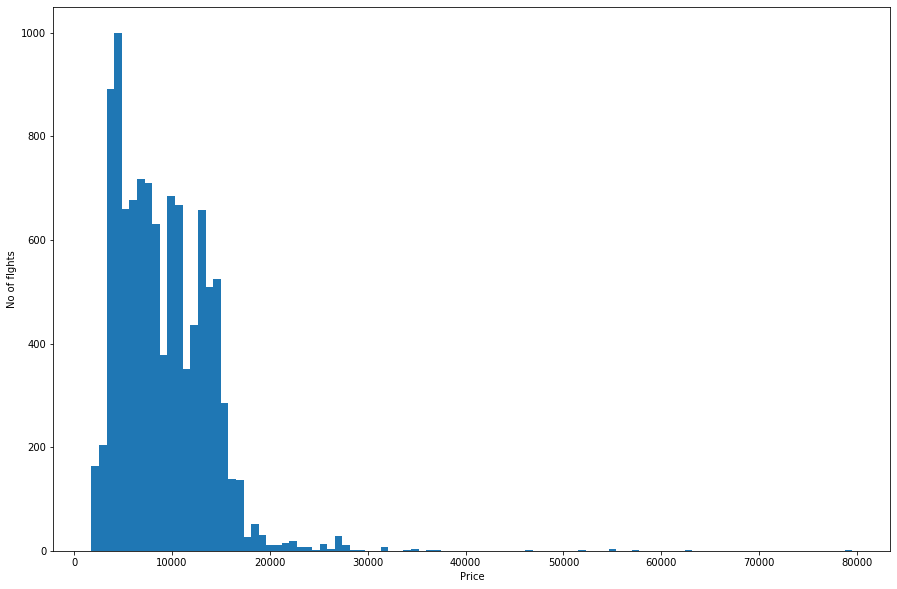

In [32]:
train_data['Price'].plot.hist(figsize=[15,10], bins=100)
plt.ylabel('No of flghts')
plt.xlabel('Price')
#plt.xticks(range(0,40000,10000))

We Can see that most of the flights are in the range **5000 to 16000** mostly and some flights are above **20000** and we can't treat them as outliers because they are high due to business class or with some extra benefits

In [33]:
test_data['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Business class                     1
Change airports                    1
1 Long layover                     1
Name: Additional_Info, dtype: int64

Text(0.5, 0, 'No of flights')

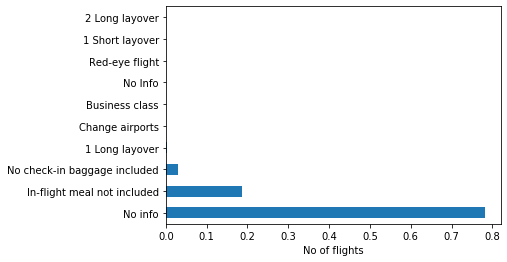

In [34]:
train_data['Additional_Info'].value_counts(normalize=True).plot.barh()
plt.xlabel('No of flights')

We can see nearly **80 percent** of flights don't have any additional information and flights with additional info as **meal not included** are **18 percent** 

Text(0, 0.5, 'Frequency')

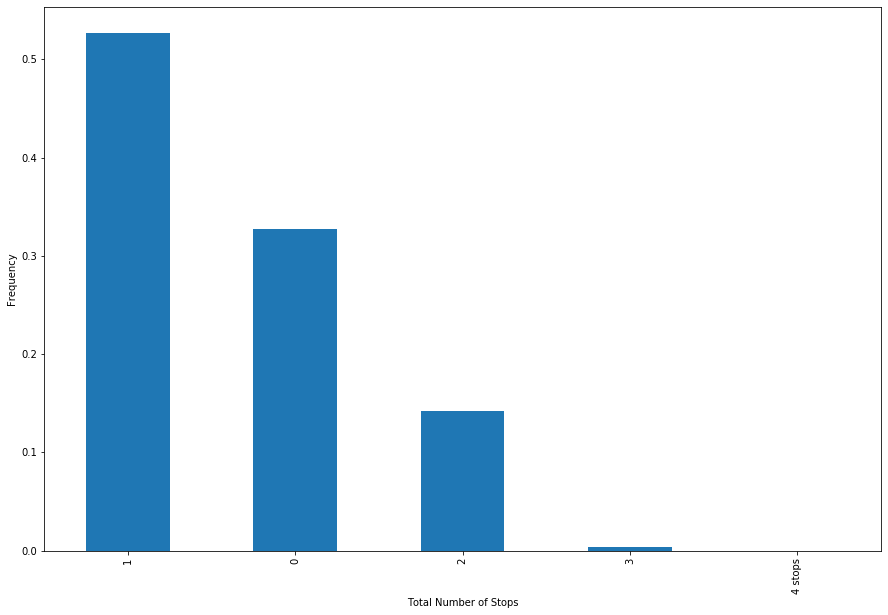

In [35]:
# Plot showing the frequency of total number of stops of the flights

train_data['Total_Stops'].value_counts(normalize=True).plot.bar(figsize=[15,10])
plt.xlabel('Total Number of Stops')
plt.ylabel('Frequency')

As it can be seen from the **Barplot** here the flights that have 1 stop are highest in number followed by flights with 0 stop and then 2 stops respectively. This trend shows that in India most of the flights are connecting flights with **1 stop** having a frequency of **52.66%** followed by **32.68%** flights with **0 stops** and **14.23%** flights with **2 stops**. Also there are very less number of flights with 3 stops and one single flight having 4 stops.

Text(0.5, 0, 'No Of flights')

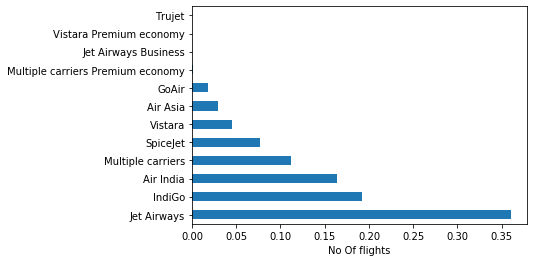

In [37]:
train_data['Airline'].value_counts(normalize=True).plot.barh()
plt.xlabel('No Of flights')

This is a **Horizontal Barplot** showing the Number of Flights of different Airlines in the dataset. The highest number of flights are of **Jet Airways** with a share of approxiamately **36%**. This suggest that **1/3rd** proportion of the flights in India are of **Jet Airways**. These can be direct or flights with 1 or 2 stops. The next top Airline in India is **IndiGo** with **19.22%** very closely follows the **Air India** airlines with **16.4%** flights in the market. The other airlines economical airlines such as **SpiceJet**, **Vistara**, **Air Asia**, **GoAir** shows that they don't have much connectivity in India.

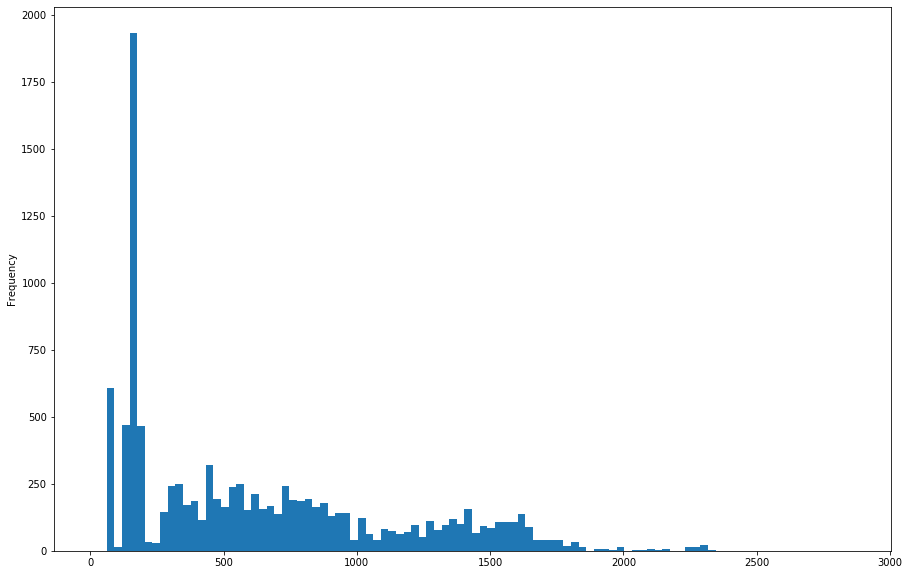

In [38]:
train_data['Duration'].plot.hist(figsize=[15,10],bins=100)

The highest number of flights are of **Duration** within **100-200 minutes** that is **1.40 to 3.20 hours**. Also there are certain number of flights between **300 to 1000 minutes**. It show that people mostly prefer flights with less Duration but also lot of the population takes connecting flight to reach smaller places around India.

# Bivarate Analysis

Text(0, 0.5, 'Airlines')

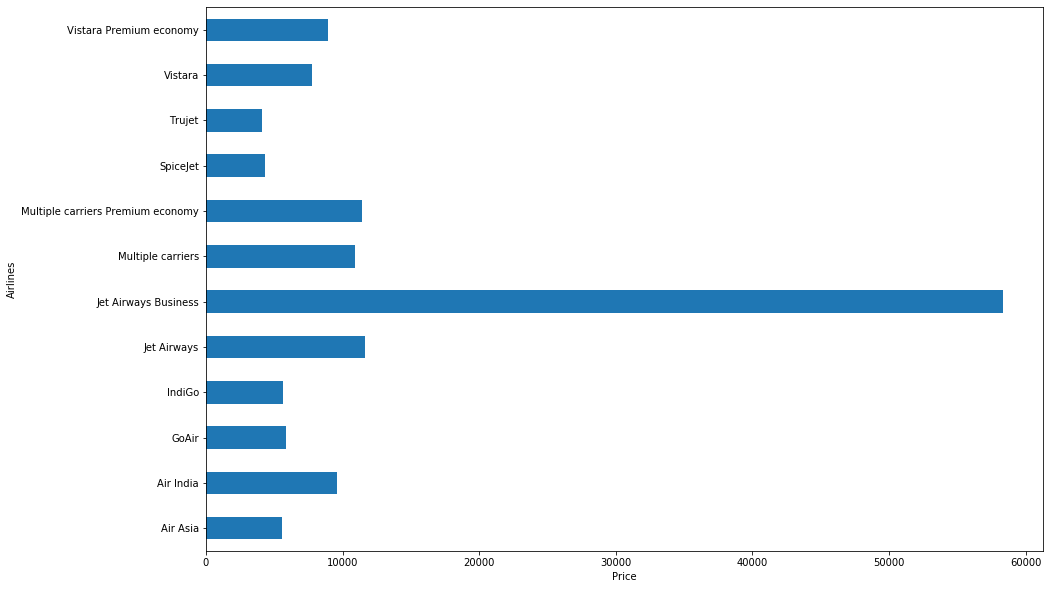

In [39]:
# Plot relating to different Airlines and their Price

train_data.groupby('Airline')['Price'].mean().plot.barh(figsize=[15,10])
plt.xlabel('Price')
plt.ylabel('Airlines')

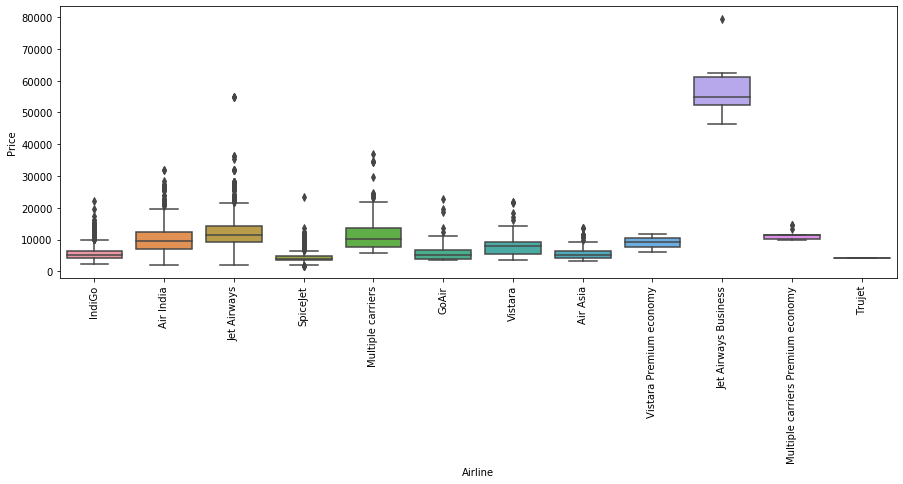

In [40]:
# Boxplot showing the Spread of the Price of different Airlines

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(train_data.Airline, train_data.Price)

It can be observed here that **Jet Airways Business** airline has the costliest ticket in India. But all other **Economical Airlines** have their ticket price within **10000**. In the **Boxplot** every airline is having certain number of outlier but those are present there because of **Total Stops** of the flight. The number of stops increases the flight ticket price decreases accordingly.

Text(0, 0.5, 'Price')

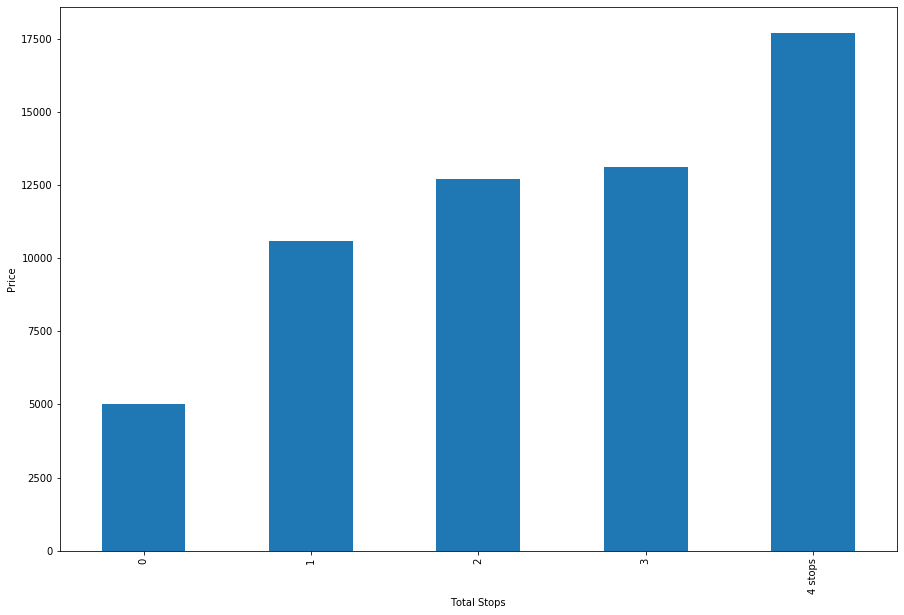

In [41]:
# Bar plot showing the trends in Price with resprct to number of Stops

train_data.groupby('Total_Stops')['Price'].mean().plot.bar(figsize=[15,10])
plt.xlabel('Total Stops')
plt.ylabel('Price')

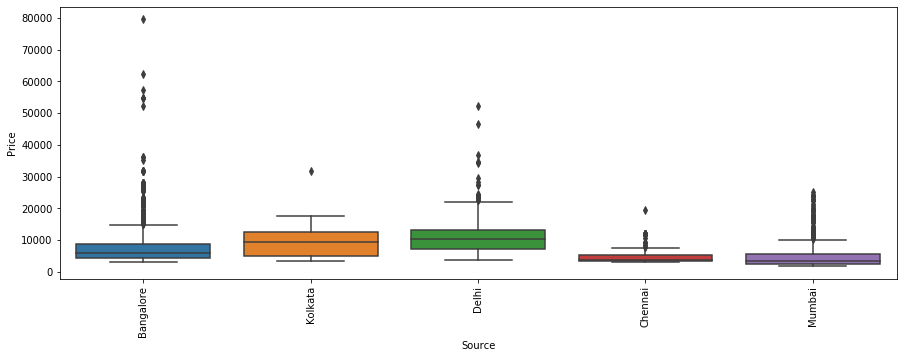

In [42]:
# Boxplot showing the spread of Price for different Source of the flights

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(train_data.Source, train_data.Price)

This is a **Boxplot** showing the **Price** trends with the **Source** of the flights. It can be observed that flights taking off from **Bangalore** have certain extreme ticket price suggesting that most **Luxury Class Airlines** flights fly from **Bangalore** and closely followed is **Delhi**. The other places that are **Kolkata**, **Chennai** and **Mumbai** seem to have **Economical Flights** flying out these cities.

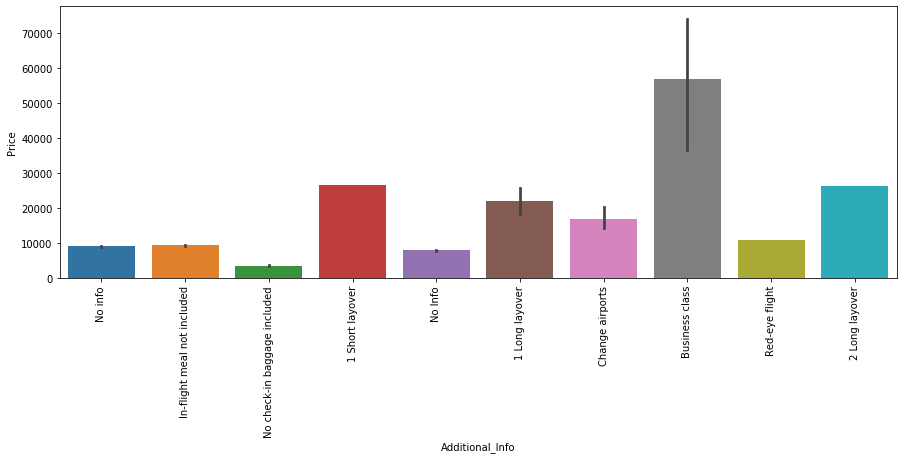

In [43]:
# Plot showing Additional details and the trends in Price of the tickets based on those

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.barplot(train_data.Additional_Info, train_data.Price )

From this **Bar Plot** we can truely come to the conclusion that **Business Class** ticket price is on the higher side. Also there is an unusual trend seen here that **1 Short Layover** and **2 Long Layover** have approximate similar price range. This can be because of many different reasons that during **2 Long layover** there would be multiple carriers of Airlines included. You cannot exactly tell the reason behind this trend.

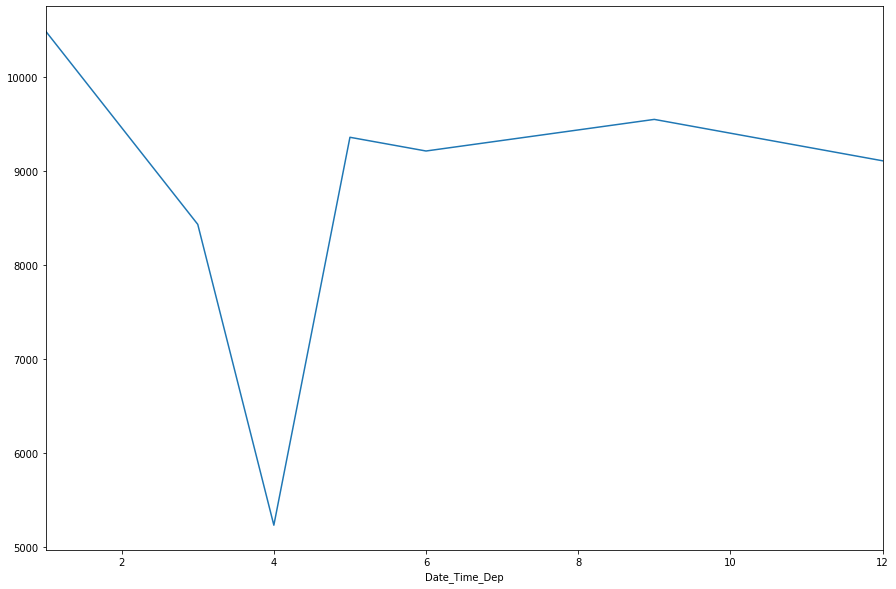

In [44]:
# Line plot showing the trend in Price of tickets during each month

plt.subplots(figsize=[15,10])
month_of_dep = train_data.groupby(train_data.index.month).Price.mean()
month_of_dep.plot()

This plot shows that the **Price** of the tickets **decreases** during the months of **March-April** and again **increases** after **April** and is stable after that.

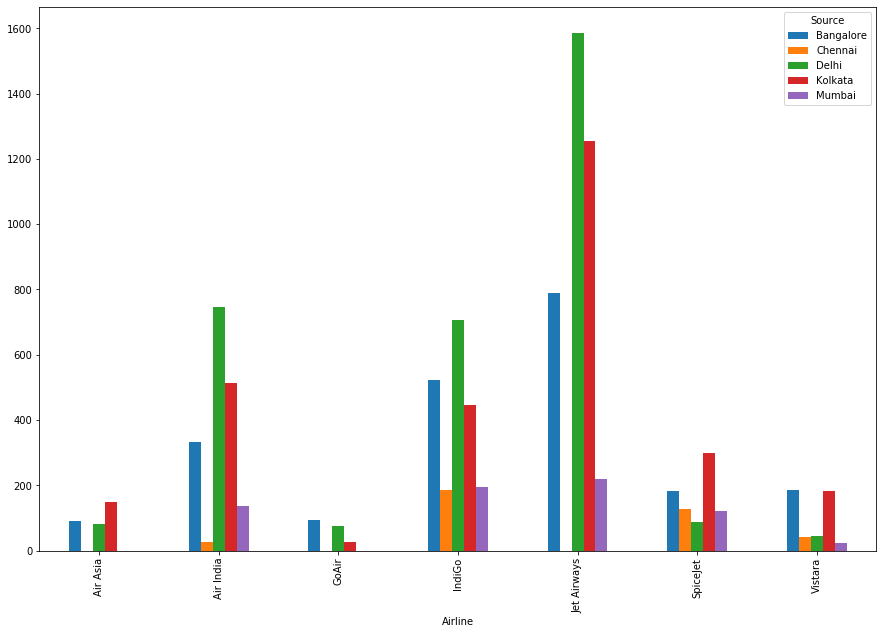

In [45]:
# Plot showing Airlines at different Source cities

table = pd.crosstab(train_data.Airline, train_data.Source)
table = table.loc[['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'SpiceJet', 'Vistara']]
table.plot(kind='bar', figsize=[15,10])

In this plot it can be seen the number of flights that take off for each Airlines in different cities of India. **Jet Airways** tops the list with most number of flights taking off from **Delhi** which is then followed by **Air India** and **IndiGo**. **Kolkata** has **2nd** highest number of flights of **Jet Airways** taking off from there with other few airlines **Air India**, **IndiGo** with less flights than **Jet Airways**. **Bangalore** again has a decent number of flights of **Jet Airways** and **IndiGo**. From **Chennai** it can be seen that there are very low or nil number of flights of **Air Asia**, **GoAir** and **Jet Airways** airlines. 

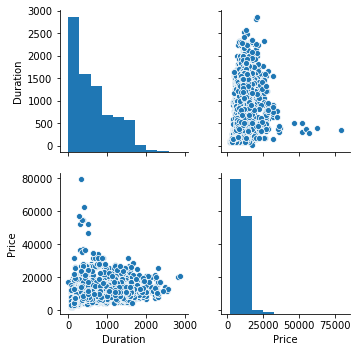

In [46]:
# Pairplot to show trends in different parameters of the flight

sns.pairplot(train_data)